In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
X = pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = pd.DataFrame(data.target)

In [8]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [43]:
DT = DecisionTreeClassifier(random_state =0).fit(X_train,y_train)

In [44]:
y_predict = DT.predict(X_test)
y_train_predict = DT.predict(X_train)

In [45]:
print('Accuracy on test data',accuracy_score(y_test,y_predict))
print('\n')
print('Accuracy on training data',accuracy_score(y_train,y_train_predict))

Accuracy on test data 0.9148936170212766


Accuracy on training data 1.0


## Key Points

This model seems to be overfit becasue difference between training data accuracy and test data accuarcy is almost 9%.
This model is performing well on training data but accuracy got reduced on test data. 
It means it is overfitting

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(600.9230769230769, 764.4375, 'X[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(407.7692307692307, 662.5125, 'X[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(300.46153846153845, 560.5875, 'X[10] <= 0.626\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(214.61538461538458, 458.66249999999997, 'X[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(171.69230769230768, 356.7375, 'X[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(85.84615384615384, 254.8125, 'X[22] <= 99.14\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(42.92307692307692, 152.88750000000005, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(128.76923076923077, 152.88750000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(257.53846153846155, 254.8125, 'X[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(214.61538461538458, 152.88750000000005, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(30

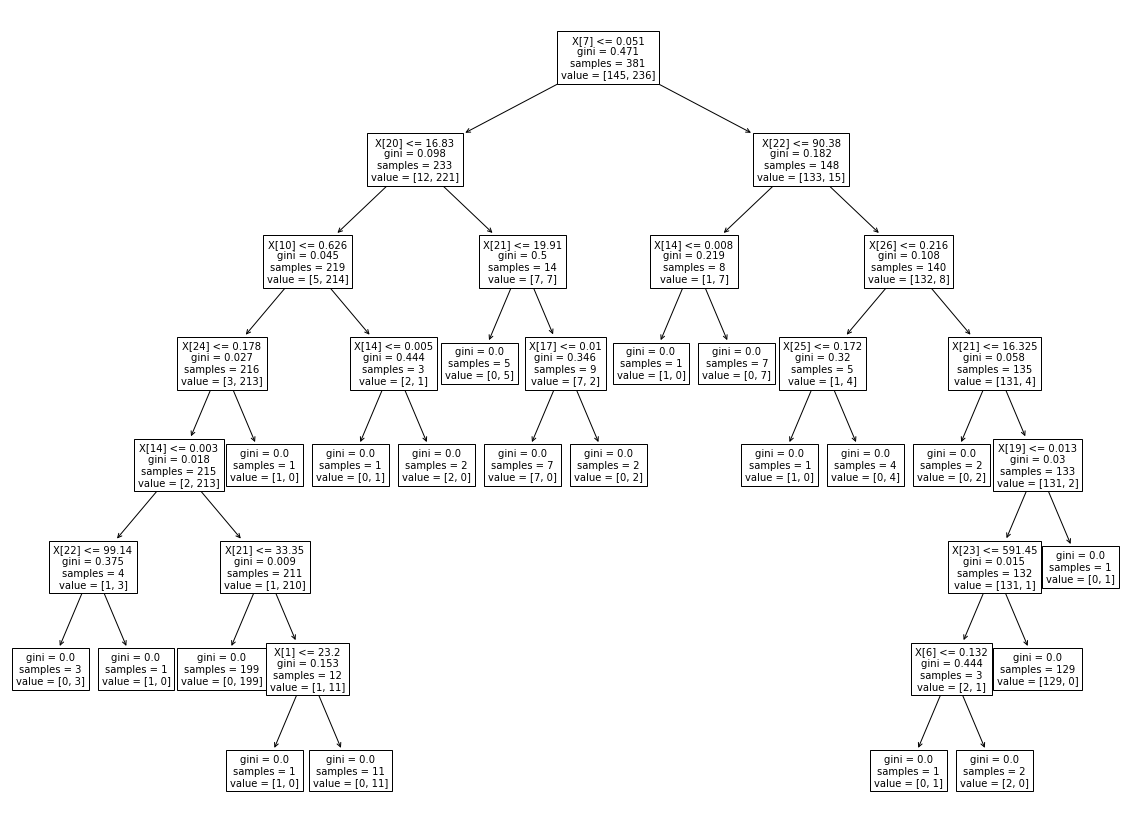

In [51]:
plt.figure(figsize=(20,15))
plot_tree(DT,fontsize=10)

## Pruning in Decision tree

In [89]:
model = DecisionTreeClassifier(max_depth =5,random_state =0).fit(X_train,y_train)

In [90]:
model_prediction = model.predict(X_test)

In [91]:
model_train_prediciton = model.predict(X_train)

In [92]:
print('Training Data accuracy :',accuracy_score(y_train,model_train_prediciton))
print('Test Data Accuracy :',accuracy_score(y_test,model_prediction))

Training Data accuracy : 0.9921259842519685
Test Data Accuracy : 0.9308510638297872


## Key point

Here we just provided a single paramter i.e. max_depth and this model is performing well as camparision to first one. Now the difference 
between taining score and test score is about 6% 

## Best Parameters for Decision Tree

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
param = {
    'max_depth':[0,1,2,3,4,5],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':["auto", "sqrt", "log2"]
}

In [97]:
Random =RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = param,
    n_iter=10,n_jobs=-1,random_state =0)

In [100]:
best_feature = Random.fit(X_train,y_train)

In [101]:
best_feature.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 3}

In [102]:
best_feature.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=5)

In [103]:
model1 = DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=5).fit(X_train,y_train)

In [104]:
model1_predict = model1.predict(X_test)

In [105]:
model1_train_predict = model1.predict(X_train)

In [106]:
print('Accuracy on training data',accuracy_score(y_train,model1_train_predict))
print('Accuracy on test data',accuracy_score(y_test,model1_predict))

Accuracy on training data 0.952755905511811
Accuracy on test data 0.925531914893617


In [108]:
print('Confusion matrix is :')
print(confusion_matrix(y_test,model1_predict))

Confusion matrix is :
[[ 57  10]
 [  4 117]]


In [109]:
print("Classification Report")
print(classification_report(y_test,model1_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        67
           1       0.92      0.97      0.94       121

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



## Key point

Now this is the best model out of three models. Hereaccuracy difference between training data and test data is about 3% 
It means model is performing well on training data and test data also.